# Pandas Introduction

Pandas is a powerful data manipulation and analysis library in Python. It provides data structures and functions to efficiently manipulate and analyze structured data. With Pandas, you can easily load, clean, transform, and analyze data, making it a popular choice for data analysis and data science tasks.


# Core components of Pandas: Series and DataFrames
The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 


DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below.

### First steps 

In the previous lab we set up conda and an environment. Remember to check that you are using the correct environment in the top right corner of Vscode.

Looks like we forgot to add seaborn to the environment. Let's do that now.

In order to use the packages we installed, we have to import them:

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Creating Dataframes from scratch
Creating DataFrames right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs.

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:


In [175]:
data = {
    'apples': [6, 2, 7, 1],
    'oranges': [1, 2, 9, 3]
}

df = pd.DataFrame(data)
df

,apples,oranges
0,6,1
1,2,2
2,7,9
3,1,3


Each (Key, Value) item in the `data` corresponds to a *column* in the DataFrame, `df`.

The **index** of this DataFrame, `df`, represents the row labels, which are automatically generated as a RangeIndex from 0 to 3. 

The *columns* of the DataFrame are labeled as apples' and 'oranges', corresponding to the keys in the `data` dictionary. 

Now lets add customers names as our **Index**:

In [176]:
customer_names = ['Alice', 'Bob', 'Charlie', 'Dave']
df.set_index(pd.Index(customer_names), inplace=True)
df

,apples,oranges
Alice,6,1
Bob,2,2
Charlie,7,9
Dave,1,3


We can now **locate** a customer's order by using their name:

In [177]:
df.loc['Alice']

apples     6
oranges    1
Name: Alice, dtype: int64

In [178]:
df.iloc[0] # same as df.loc['Alice'] only this time we're locating by index

apples     6
oranges    1
Name: Alice, dtype: int64

## How to read in data

<img src="img/read_pandas.png">


We can easily load data from various file formats into a DataFrame:

In [179]:
iris = pd.read_csv('./data/iris.csv', index_col=0) # index_col=0 means that the first column (id) is the index
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


We can look at the *head* and *tail* of the dataset using the head() and tail() functions:

In [180]:
iris.head() # first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
iris.tail(3) # last 3 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [182]:
iris.shape

(150, 5)

In [183]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Looks like this dataset is complete and it has no missing values. It's always a good idea to check before you start working with the data.

In [184]:
iris[0:3]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [185]:
iris.loc[5:10, ['SepalLengthCm', 'SepalWidthCm']]

,SepalLengthCm,SepalWidthCm
Id,,
5,5.0,3.6
6,5.4,3.9
7,4.6,3.4
8,5.0,3.4
9,4.4,2.9
10,4.9,3.1


In [186]:
iris["Species"].unique() # unique values in column

# iris.Species.unique() # same as above

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [187]:
# Count all species
iris.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

We can visualize the dataset with a plot

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

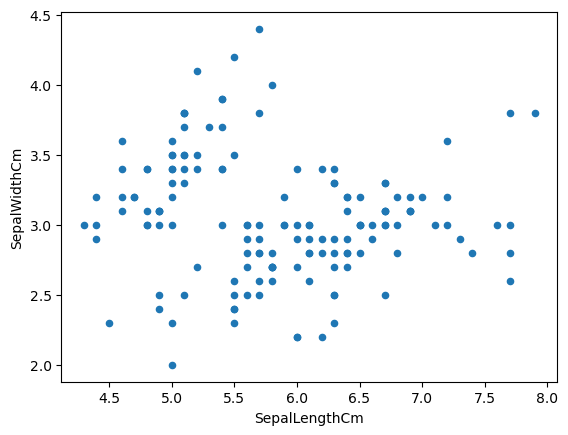

In [188]:
iris.plot(kind ="scatter", x = "SepalLengthCm", y = "SepalWidthCm")

That's pretty good, but maybe we can set each species with different colors on the plot?

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

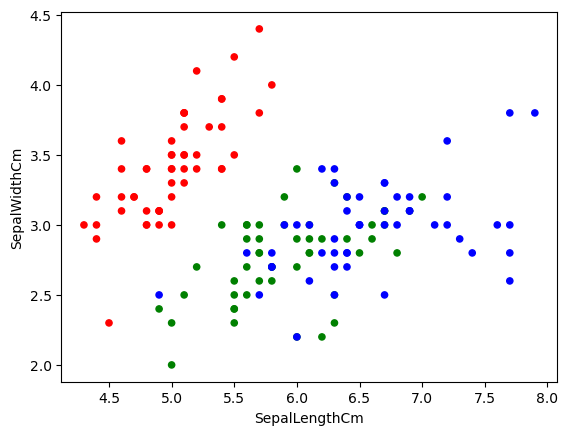

In [189]:
# Set each species to a different color
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

iris.plot(kind ="scatter", x = "SepalLengthCm", y = "SepalWidthCm", c=iris['Species'].apply(lambda x: colors[x]))

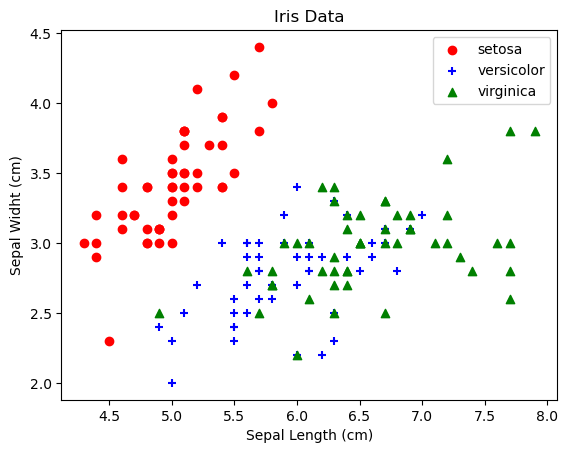

In [190]:
# We can also plot this with matplotlib

iris_setosa = iris[iris["Species"] == "Iris-setosa"]
iris_versicolor = iris[iris["Species"] == "Iris-versicolor"]
iris_virginica = iris[iris["Species"] == "Iris-virginica"]
plt.scatter(x = iris_setosa.SepalLengthCm, y = iris_setosa.SepalWidthCm, marker ="o", color ="r", label = "setosa")
plt.scatter(x = iris_versicolor.SepalLengthCm, y = iris_versicolor.SepalWidthCm, marker ="+", color ="b", label = "versicolor")
plt.scatter(x = iris_virginica.SepalLengthCm, y = iris_virginica.SepalWidthCm, marker ="^", color ="g", label = "virginica")
plt.legend(loc ="upper right")
plt.title("Iris Data")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Widht (cm)")
plt.show()

Interesting, there seems to be 3 distinct groups which are easy to identify when we change the colors in the plot

We should look at the petal length and width as well:

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

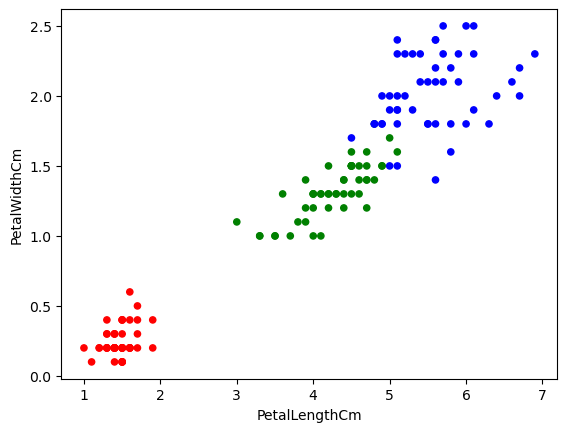

In [191]:
iris.plot(kind ="scatter", x = "PetalLengthCm", y = "PetalWidthCm", c=iris['Species'].apply(lambda x: colors[x]))

Let's have a look at some of the values. There seem to be some outliers in the dataset.

In [192]:
iris.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [193]:
iris.groupby('Species').min()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [194]:
iris.groupby('Species').max()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


<Axes: xlabel='Species', ylabel='PetalWidthCm'>

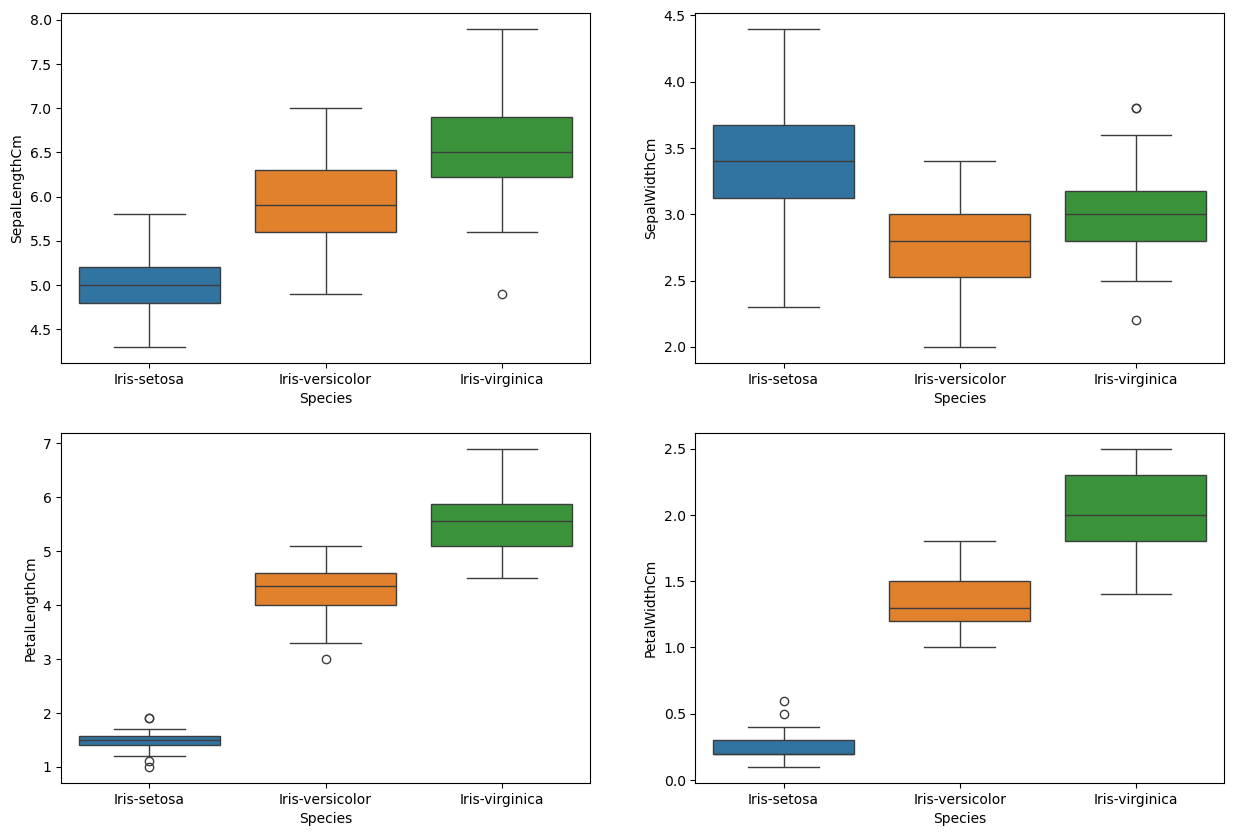

In [195]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y = 'SepalLengthCm', data=iris, hue='Species')

plt.subplot(2,2,2)
sns.boxplot(x='Species', y = 'SepalWidthCm', data=iris, hue='Species')

plt.subplot(2,2,3)
sns.boxplot(x='Species', y = 'PetalLengthCm', data=iris, hue='Species')

plt.subplot(2,2,4)
sns.boxplot(x='Species', y = 'PetalWidthCm', data=iris, hue='Species')

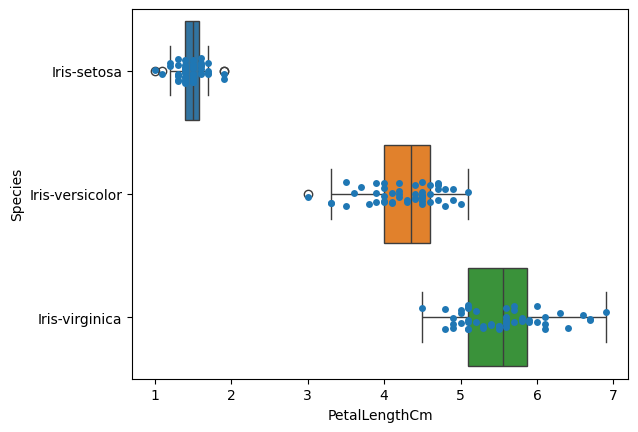

In [196]:
# One way to make this more readable is to add another layer of individual data points on top of the boxplot
ax = sns.boxplot(data=iris, y = 'Species',x = 'PetalLengthCm', hue = 'Species')
ax = sns.stripplot(data=iris, y='Species', x='PetalLengthCm', jitter=True)

How or if you deal with outliers differs from dataset to dataset. 

There are several approaches you can take depending on the specific context and goals of your analysis. 

Here are a few common strategies:

- **Keep the outliers**: Sometimes outliers may contain valuable information or represent important data points. 

- **Remove the outliers**: If the outliers are considered to be noise or anomalies that do not reflect the true nature of the data, you may choose to remove them from your dataset. This can help improve the accuracy and reliability of your analysis. However, be cautious when removing outliers, as it can potentially bias your results.

- **Transform the outliers**: Instead of removing the outliers, you can apply a transformation to the data to reduce the impact of outliers. Common transformations include winsorization, where extreme values are replaced with less extreme values.

- **Handle outliers separately**: Another approach is to handle outliers separately from the rest of the data. You can create a separate category or group for outliers and analyze them separately. This can help identify patterns or insights specific to the outliers.

It's important to carefully consider the nature of your data, the goals of your analysis, and the potential impact of outliers before deciding on the best approach to deal with them.


### Let's remove the outliers using IQR method

In this example, we’ll show how to remove outliers using the Interquartile Range (IQR) method. 

Outliers are data points that fall significantly outside the range between the first (Q1) and third quartiles (Q3).

We’ll apply this method separately for each species in the Iris dataset to ensure that outliers are identified accurately within the context of each species' distribution.

In [197]:
# Iterate over each column in the DataFrame, excluding the first and last columns
for column in iris.columns[1:-1]:
    
    # Iterate over each unique species in the Species column
    for species in iris["Species"].unique():
        
        # Filter the DataFrame to include only rows for the current species
        species_data = iris[iris["Species"] == species]
        
        # Select the current column for the filtered species data
        selected_column = species_data[column]
        
        # Calculate the first quartile (25th percentile) of the selected column
        q1 = selected_column.quantile(0.25)
        
        # Calculate the third quartile (75th percentile) of the selected column
        q3 = selected_column.quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        iqr = q3 - q1
        
        # Calculate the upper limit for detecting outliers
        upper_limit = q3 + 1.5 * iqr
        
        # Calculate the lower limit for detecting outliers
        lower_limit = q1 - 1.5 * iqr
        
        # Identify the indices of outliers in the selected column
        outliers = selected_column[(selected_column > upper_limit) | (selected_column < lower_limit)].index
        
        # Print the indices of the outliers
        print(outliers)
        
        # Drop the outliers from the original DataFrame in place
        iris.drop(index=outliers, inplace=True)



Index([], dtype='int64', name='Id')
Index([], dtype='int64', name='Id')
Index([118, 120, 132], dtype='int64', name='Id')
Index([14, 23, 25, 45], dtype='int64', name='Id')
Index([99], dtype='int64', name='Id')
Index([119], dtype='int64', name='Id')
Index([24, 44], dtype='int64', name='Id')
Index([], dtype='int64', name='Id')
Index([], dtype='int64', name='Id')


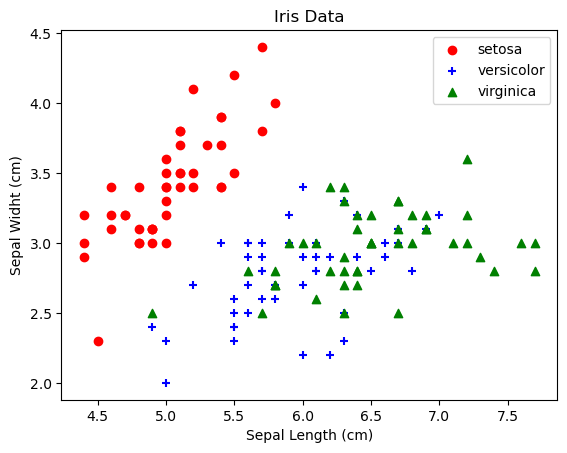

In [198]:
# We can also plot this with matplotlib

iris_setosa = iris[iris["Species"] == "Iris-setosa"]
iris_versicolor = iris[iris["Species"] == "Iris-versicolor"]
iris_virginica = iris[iris["Species"] == "Iris-virginica"]
plt.scatter(x = iris_setosa.SepalLengthCm, y = iris_setosa.SepalWidthCm, marker ="o", color ="r", label = "setosa")
plt.scatter(x = iris_versicolor.SepalLengthCm, y = iris_versicolor.SepalWidthCm, marker ="+", color ="b", label = "versicolor")
plt.scatter(x = iris_virginica.SepalLengthCm, y = iris_virginica.SepalWidthCm, marker ="^", color ="g", label = "virginica")
plt.legend(loc ="upper right")
plt.title("Iris Data")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Widht (cm)")
plt.show()

Other great plots that help you understand your data better:

c:\Users\bjark\anaconda3\envs\DAVE3625\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



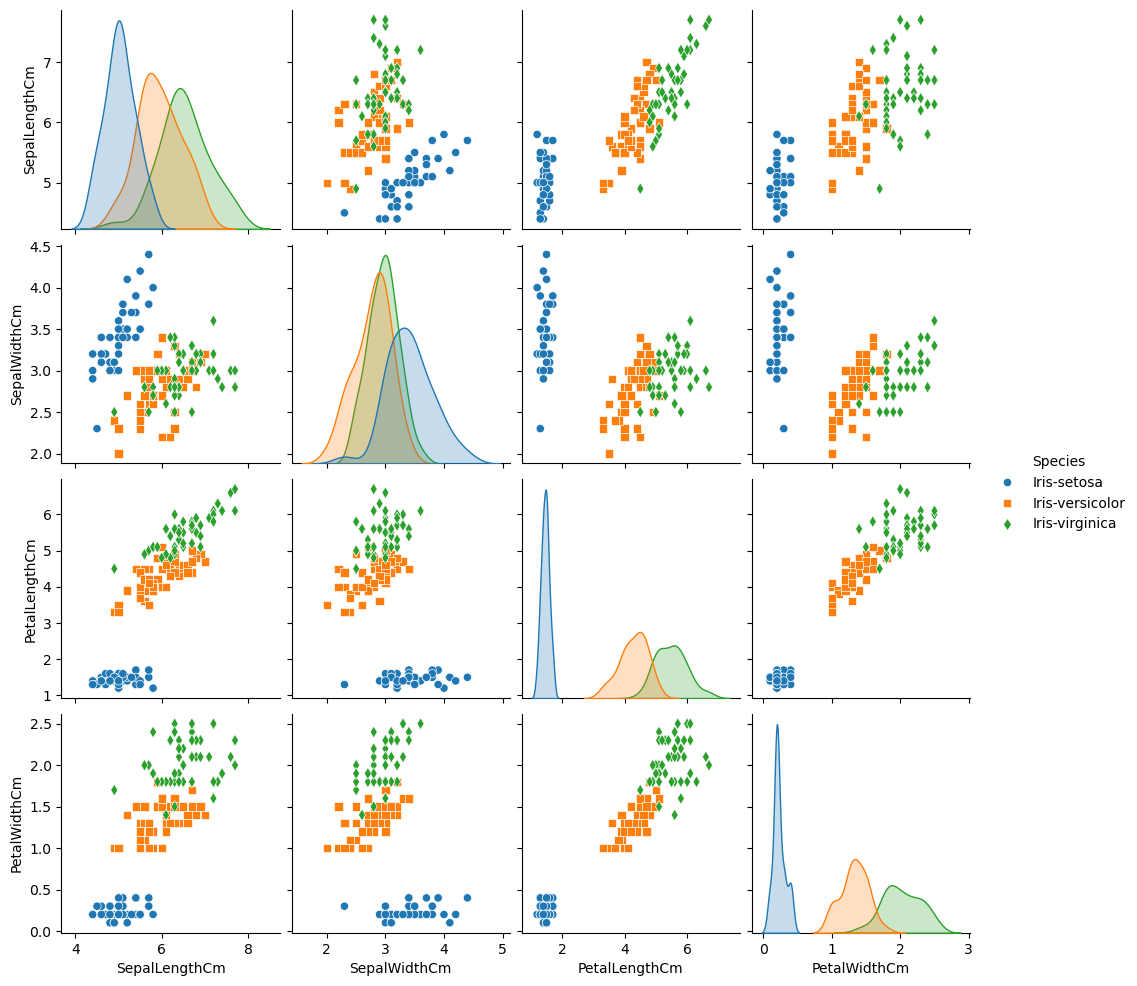

In [199]:
#sns.pairplot(data = iris, hue='Species', diag_kind='kde')
#sns.pairplot(data = iris, hue='Species', kind='reg')
sns.pairplot(data = iris, hue='Species', markers=["o", "s", "d"])

Extra! Plotly is a great tool, try it out!

In [200]:
# First install plotly in the anaconda prompt with the following command
# conda install plotly
# Then we can use plotly to create interactive plots
# Remove the commented code below to run the plotly code
#import plotly.express as px

In [201]:
#fig = px.scatter_3d(iris, x="SepalWidthCm", y="SepalLengthCm", z='PetalLengthCm', color="Species")
#fig.show()

# 10 minute break

# Intermediate pandas

<img src = "./img/data_cleaning.png">

Pandas includes hundreds of methods and other operations that are crucial for any data analysis. You should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Lets load the IMDB top 1000 movies dataset to begin. We're loading this dataset from a CSV and designating the movie rank to be the index.

In [202]:
movie_df = pd.read_csv('./data/IMDB-Movie.csv', index_col='Rank')

As discussed earlier, the first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. 

We can accomplish this with `.head()`:

In [203]:
movie_df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [204]:
movie_df.tail(3)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


<img src='./img/methods.png'>

### Exercise 10 mins
1. How many different Directors of movies are available?
2. What is the title of the shortest movie?
3. Who is the director of the longest movie?
4. How many Movies have been directed by Ridley Scott?
5. Which is the highest and lowest rated movies?

In [205]:
#1. How many different Directors of movies are available?


In [206]:
#2. What is the title of the shortest movie?


In [207]:
#3. Who is the director of the longest movie?


In [208]:
#4. How many Movies have been directed by Ridley Scott?


In [209]:
#5. Which is the highest and lowest rated movies?


### Let's get some information about the data

`.info()` should be one of the first commands you run after loading your data:

In [210]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

Another fast and useful attribute is `.shape`, which outputs just a tuple of (rows, columns):

In [211]:
movie_df.shape

(1000, 11)

Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

You'll be going to `.shape` a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

## Data Transformation
### Handling duplicates

This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [212]:
temp_df = pd.concat([movie_df, movie_df], ignore_index=True)

temp_df.shape

(2000, 11)

In [213]:
temp_df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [214]:
temp_df.iloc[1000:1005]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1000,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1001,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
1002,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
1003,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
1004,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


We can drop the duplicates with `drop_duplicates()`
temp_df.shape confirms this worked

In [215]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

### Dataset cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:


In [216]:
movie_df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [217]:
movie_df[['Title', 'Rating']]

,Title,Rating
Rank,,
1,Guardians of the Galaxy,8.1
2,Prometheus,7.0
3,Split,7.3
4,Sing,7.2
5,Suicide Squad,6.2
...,...,...
996,Secret in Their Eyes,6.2
997,Hostel: Part II,5.5
998,Step Up 2: The Streets,6.2


Let's simplify some of the names in the dataframe using the `rename()` method.

In [218]:
movie_df.rename(columns={
        'Runtime (Minutes)': 'Runtime_minutes', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movie_df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_minutes', 'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Let's simplify it even further and set all column names to lowercase

In [219]:
movie_df.columns = [col.lower() for col in movie_df]
movie_df.columns

#movie_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 'rating', 'votes', 'revenue_millions', 'metascore'] # This is also a valid way to do this

Index(['title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime_minutes', 'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## Handling missing values
### How do we work with missing values?
When you are exploring data, you'll most likely encounter missing or null values which are essentially placeholders for non-existing values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which must be handled differently

There are two options when dealing with nulls:
1. Get rid of the rows or columns with nulls.
2. Replace nulls with non-null values (`imputations`)

Let's calculate the total number of nulls in the dataset.

In [220]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1000 non-null   object 
 1   genre             1000 non-null   object 
 2   description       1000 non-null   object 
 3   director          1000 non-null   object 
 4   actors            1000 non-null   object 
 5   year              1000 non-null   int64  
 6   runtime_minutes   1000 non-null   int64  
 7   rating            1000 non-null   float64
 8   votes             1000 non-null   int64  
 9   revenue_millions  872 non-null    float64
 10  metascore         936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [221]:
movie_df.isnull()

,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


Hmm... This wasn't very helpful, there's a lot of data and it only shows wether it's `True` or `False`

We must use `isnull()` in combination with `sum()`!

In [222]:
new_df = movie_df.copy()

new_df.isnull().sum()


title                 0
genre                 0
description           0
director              0
actors                0
year                  0
runtime_minutes       0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

As we can see there's **128** missing values for `revenue_millions` and **64** for `metascore`.

Let's remove these with the `dropna()` method.

In [223]:
new_df.dropna(inplace=True) # Remember to use inplace=True to make the changes permanent!

In [224]:
new_df.shape

(838, 11)

Oh no! The index which was the Rank is now not suitable to be the index anymore. Let's make put back the normal index.

In [225]:
# make rank a column again and index a num
new_df.reset_index(inplace=True)


In [226]:
# Let's set the title as the index
new_df.set_index('title', inplace=True)
new_df.head()

,Rank,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Imputation
Imputation is a conventional feature engineering technique used to keep valuable data that have null values. 

There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 

Let's look at imputing the missing values in the `revenue_millions` column. First we'll extract that column into its own variable:

In [227]:
revenue = movie_df['revenue_millions']

Using square brackets is the general way we select columns in a DataFrame. 

If you remember back to when we created DataFrames from scratch, the keys of the `dict` ended up as column names. Now when we select columns of a DataFrame, we use brackets just like if we were accessing a Python dictionary. 

`revenue` now contains a Series:

In [228]:
revenue

Rank
1       333.13
2       126.46
3       138.12
4       270.32
5       325.02
         ...  
996        NaN
997      17.54
998      58.01
999        NaN
1000     19.64
Name: revenue_millions, Length: 1000, dtype: float64

Slightly different formatting than a DataFrame, but we still have our `Title` index. 

We'll impute the missing values of revenue using the mean. Here's the mean value:

In [229]:
revenue_mean = revenue.mean()
revenue_mean

82.95637614678898

In [230]:
revenue.fillna(revenue_mean, inplace=True)
revenue.isna().sum()

0

In [231]:

movie_df['revenue_millions'] = revenue
movie_df.isna().sum()

title                0
genre                0
description          0
director             0
actors               0
year                 0
runtime_minutes      0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputing an entire column with the same value is a pretty basic way of going about this. 

It would be a better idea to try a more granular imputation by genre or director, ofcourse the best would be to have the actual data.

Let's do that for the metascore column:

In [232]:
movie_df['metascore'].fillna(movie_df['metascore'].median(), inplace = True)

In [233]:
movie_df.isnull().sum()

title               0
genre               0
description         0
director            0
actors              0
year                0
runtime_minutes     0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64